In [4]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn 
!pip install matplotlib

In [23]:
!pip install DataFrame

  Created wheel for DataFrame: filename=dataframe-1.0.0-py3-none-any.whl size=1179 sha256=db3bb25d510fc3a9c55961326afafc5f4c62140c512c55bcfb6d415f7e51b985
  Stored in directory: /root/.cache/pip/wheels/96/d7/03/34eac34fc433c0ff66068cd462ef0ad02db10e049225ff3804
Successfully built DataFrame


In [5]:
import numpy as np # linear alegbra 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from datetime import timedelta

In [6]:
pd.plotting.register_matplotlib_converters()

In [7]:
filepath = './Data/covid-variants.csv'
region_filepath = './Data/continents2.csv'
pop_filepath = './Data/2021_population.csv'

In [8]:
df = pd.read_csv(filepath)
region = pd.read_csv(region_filepath)
pop = pd.read_csv(pop_filepath)

In [9]:
df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


we need to fix the dtype of data

In [11]:
df.date = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   location             100416 non-null  object        
 1   date                 100416 non-null  datetime64[ns]
 2   variant              100416 non-null  object        
 3   num_sequences        100416 non-null  int64         
 4   perc_sequences       100416 non-null  float64       
 5   num_sequences_total  100416 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [12]:
df.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


In [13]:
df.describe(include = 'object')

,location,variant
count,100416,100416
unique,121,24
top,Netherlands,Alpha
freq,1080,4184


This dataset contains data on 24 variants in 121 countries 

In [15]:
first_omi_date = df[(df['variant'] == 'Omicron') & (df['num_sequences'] >0 )].date.min()
print(f'The first omicorn variant was discovered on {first_omi_date: %d-%b-%y}')

The first omicorn variant was discovered on  18-Oct-21


In [16]:
omi_by_date = df[(df['variant'] == 'Omicron')].groupby('date').agg({'num_sequences':'sum'})
omi_by_date

,num_sequences
date,
2020-05-11,0
2020-05-25,0
2020-06-08,0
2020-06-22,0
2020-07-06,0
2020-07-20,0
2020-08-03,0
2020-08-17,0
2020-08-31,0


Everything looks good now let's move on 

Text(0, 0.5, 'Total number of Omicorn cases')

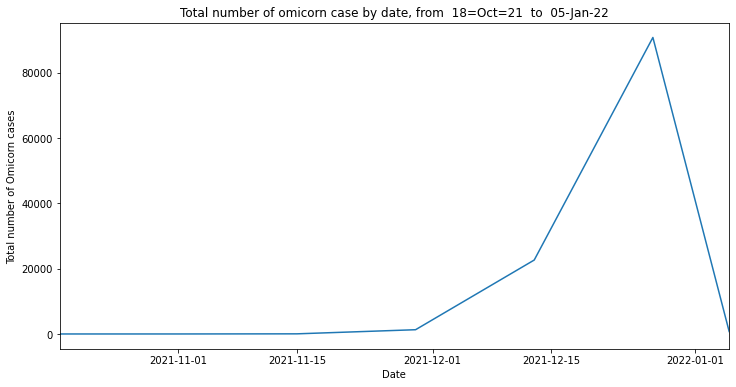

In [17]:
plt.figure(figsize =(12,6))
sns.lineplot(data = omi_by_date['num_sequences'])
plt.xlim(first_omi_date, df.date.max())
plt.title(f'Total number of omicorn case by date, from {first_omi_date: %d=%b=%y } to {df.date.max() : %d-%b-%y}')
plt.xlabel('Date')
plt.ylabel('Total number of Omicorn cases')

In [29]:
highest_omi_cases = omi_by_date[omi_by_date['num_sequences'] == omi_by_date['num_sequences'].max()]
print(f'The highest number of omicorn cases occured on {highest_omi_cases.index.date[0]: %d-%b-%y} with {highest_omi_cases.num_sequences[0]} cases recorded.')

The highest number of omicorn cases occured on  27-Dec-21 with 90795 cases recorded.


In [20]:
omi_by_loca = df[(df['variant'] == 'Omicron')].groupby('location').agg({'num_sequences':'sum'}).sort_values('num_sequences', ascending = False)
omi_by_loca_notnull = omi_by_loca[omi_by_loca.num_sequences > 0]
omi_by_loca_notnull.describe()

,num_sequences
count,78.000000
mean,1481.256410
std,8000.401121
min,1.000000
25%,11.250000
50%,42.000000
75%,244.250000
max,65137.000000


Text(0.5, 1.0, 'Total number of Omicorn cases, by country')

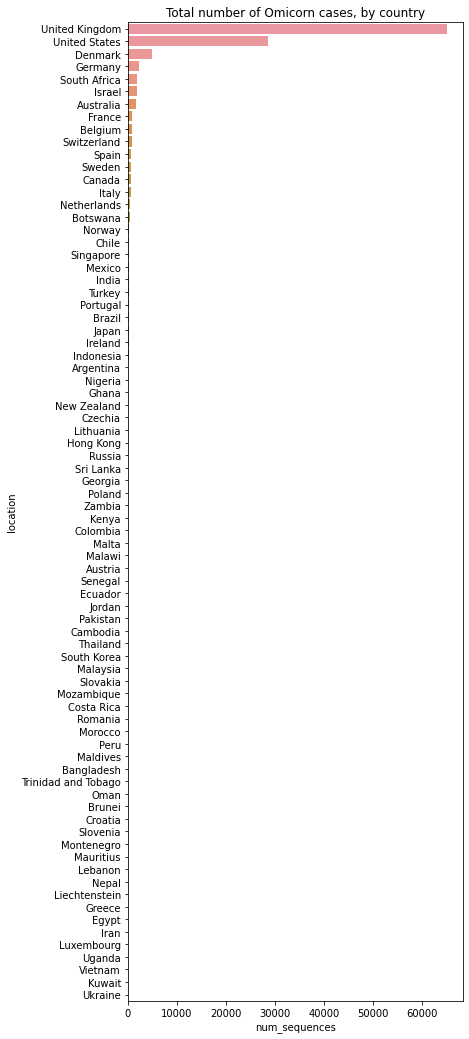

In [28]:
plt.figure(figsize = (6,18))
sns.barplot(x = omi_by_loca_notnull.num_sequences, y= omi_by_loca_notnull.index )
plt.title('Total number of Omicorn cases, by country')

In [30]:
omi_uk = df[(df['location'] == 'United Kingdom') & (df['variant'] == 'Omicron')]

Text(0, 0.5, 'Total number of Omicorn Cases')

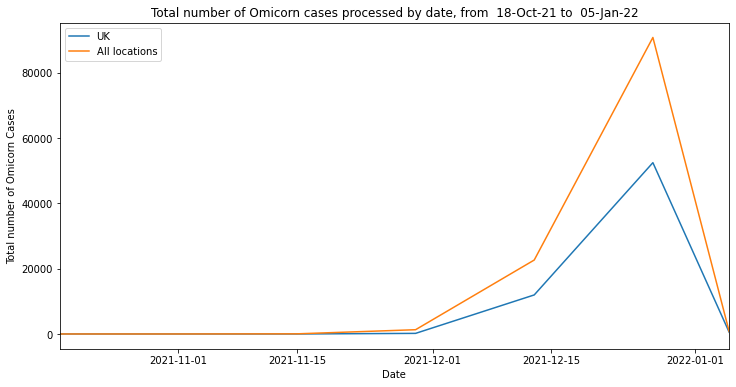

In [33]:
plt.figure(figsize = (12,6))
sns.lineplot(data = omi_uk, x = 'date', y = 'num_sequences', label = 'UK')
sns.lineplot(data = omi_by_date ['num_sequences'], label = 'All locations')
plt.xlim(first_omi_date, df.date.max())
plt.title(f'Total number of Omicorn cases processed by date, from {first_omi_date: %d-%b-%y} to {df.date.max(): %d-%b-%y}')
plt.xlabel('Date')
plt.ylabel('Total number of Omicorn Cases')

In [34]:
region.head()
region2 = region.iloc[:,[0,6]]

In [35]:
region2

,name,sub-region
0,Afghanistan,Southern Asia
1,Åland Islands,Northern Europe
2,Albania,Southern Europe
3,Algeria,Northern Africa
4,American Samoa,Polynesia
...,...,...
244,Wallis and Futuna,Polynesia
245,Western Sahara,Northern Africa
246,Yemen,Western Asia
247,Zambia,Sub-Saharan Africa


renaming the name column to locaton for ease of merging 

In [36]:
region2 = region2.rename(columns = {'name':'location'})
region2

,location,sub-region
0,Afghanistan,Southern Asia
1,Åland Islands,Northern Europe
2,Albania,Southern Europe
3,Algeria,Northern Africa
4,American Samoa,Polynesia
...,...,...
244,Wallis and Futuna,Polynesia
245,Western Sahara,Northern Africa
246,Yemen,Western Asia
247,Zambia,Sub-Saharan Africa


In [37]:
df2 = pd.merge(df, region2)
df2.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total,sub-region
0,Angola,2020-07-06,Alpha,0,0.0,3,Sub-Saharan Africa
1,Angola,2020-07-06,B.1.1.277,0,0.0,3,Sub-Saharan Africa
2,Angola,2020-07-06,B.1.1.302,0,0.0,3,Sub-Saharan Africa
3,Angola,2020-07-06,B.1.1.519,0,0.0,3,Sub-Saharan Africa
4,Angola,2020-07-06,B.1.160,0,0.0,3,Sub-Saharan Africa


In [39]:
omi_by_reg = df2[df2.variant == 'Omicorn'].groupby('sub-region').agg({'num_sequences': 'sum'}).sort_values('num_sequences', ascending = False).reset_index()
omi_by_reg.style.set_caption('Omicron cases by sub-region') 

,sub-region,num_sequences


it should print a whole list, but i don't know why it is not printing 

In [42]:
omi_by_date_reg = pd.pivot_table(df2[(df2.variant == 'Omicron') & (df2.date > first_omi_date)], 
                                 index='date',
                                 columns='sub-region',
                                 values='num_sequences',
                                 aggfunc='sum',
                                 fill_value = 0)
omi_by_date_reg

sub-region,Australia and New Zealand,Eastern Asia,Eastern Europe,Latin America and the Caribbean,Melanesia,Northern Africa,Northern America,Northern Europe,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
date,,,,,,,,,,,,,,
2021-11-01,0,0,0,0,0,0,1,2,0,0,0,1,0,0
2021-11-15,0,3,0,0,0,0,1,0,0,1,0,36,0,1
2021-11-29,8,18,0,7,0,0,78,209,3,10,25,811,7,125
2021-12-13,369,48,28,112,0,1,4334,14060,53,49,356,1488,232,1506
2021-12-27,1382,153,85,822,0,15,24706,56288,407,234,1099,256,1849,3442
2022-01-05,10,0,14,0,0,0,28,539,0,16,0,0,0,136


Text(0.5, 1.0, 'Number of Omicron cases by date and sub-region')

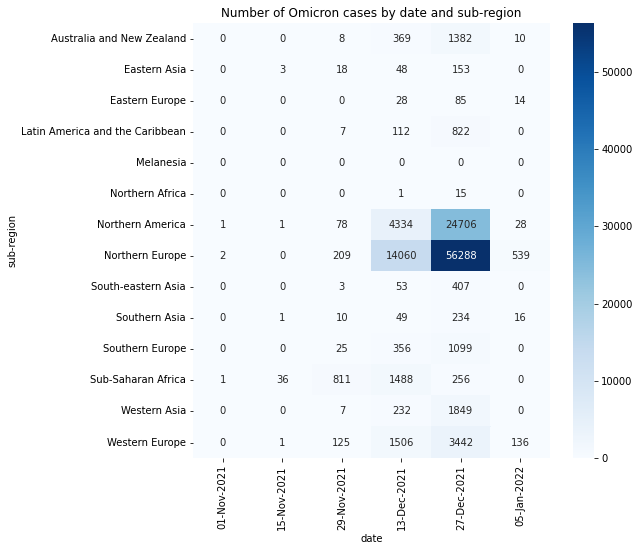

In [43]:
plt.figure(figsize = (8,8))
ax = sns.heatmap(data = omi_by_date_reg.transpose(), annot=True, fmt = 'd',cmap = 'Blues')
ax.set_xticklabels(omi_by_date_reg.index.strftime('%d-%b-%Y'))
plt.title('Number of Omicron cases by date and sub-region')

In [44]:
cov_by_var_reg= pd.pivot_table(df2, 
               index = 'sub-region',
               columns = 'variant',
               values = 'num_sequences',
               aggfunc = 'sum')


Text(0.5, 1.0, 'Number of COVID19 cases by variant and sub-region')

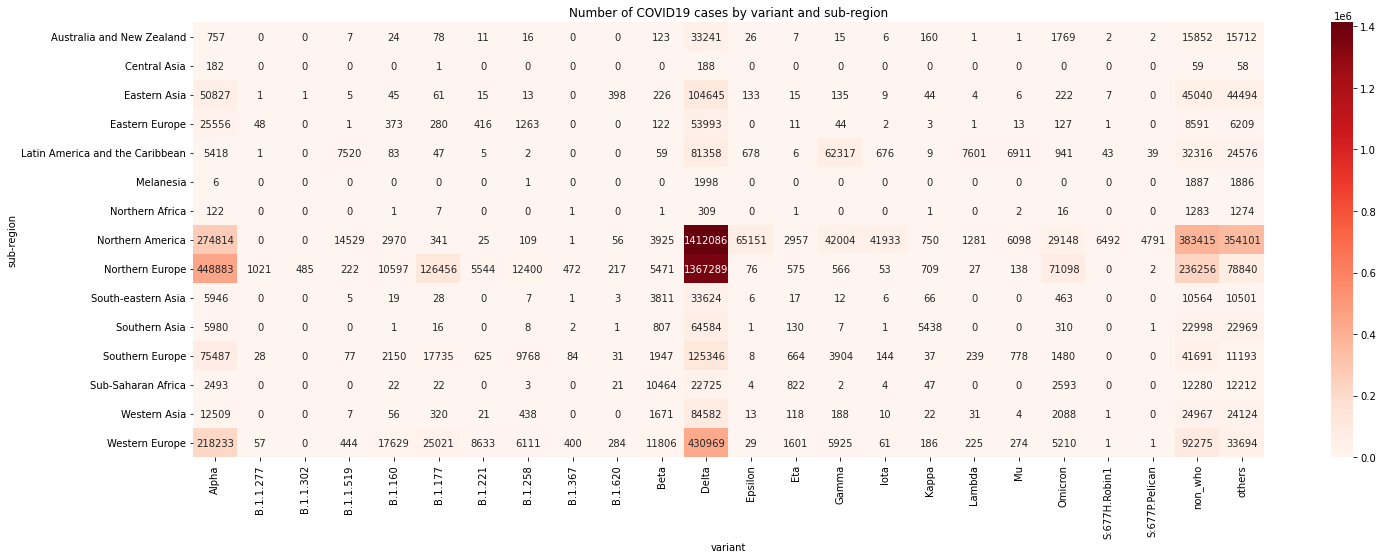

In [45]:
plt.figure(figsize = (24,8))
sns.heatmap(data = cov_by_var_reg, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Number of COVID19 cases by variant and sub-region')